In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)

In [2]:
final_data = pd.read_csv('data/최종작업파일/final_data.csv', encoding = 'utf-8')
final_data

,대여시간,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량(Kcal),탄소량(%),이동거리(KM),사용시간(분),년도,월
0,0,영등포구청역 1번출구,정기권,F,10대이하,1,31.27,0.39,1.68,155,2017,1
1,0,신한은행 안국역지점 옆,정기권,F,20대,1,47.32,0.55,2.39,15,2017,1
2,0,탑골공원 앞,정기권,F,20대,1,57.92,0.52,2.25,13,2017,1
3,0,홍연2교옆,정기권,F,20대,1,133.29,1.53,6.60,43,2017,1
4,0,삼각지역 4번출구 앞,정기권,F,20대,1,33.88,0.32,1.38,8,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41511134,23,가좌삼거리,일일권,M,30대,1,354.51,1.23,5.00,13,2020,12
41511135,23,비전교회 앞,일일권,M,30대,1,354.51,1.23,5.00,52,2020,12
41511136,23,상봉역 3번출구,일일권,M,30대,1,18.33,0.17,0.71,4,2020,12
41511137,23,상계역(4번출구),일일권,M,50대,1,20.52,0.15,0.65,7,2020,12


In [3]:
new_data=pd.pivot_table(final_data, index = ['년도'], values=['사용시간(분)','운동량(Kcal)','이동거리(KM)','이용건수','탄소량(%)'],\
                        aggfunc = ['sum','mean'])
new_data

sum                                                      \
        사용시간(분)     운동량(Kcal)      이동거리(KM)      이용건수        탄소량(%)   
년도                                                                    
2017  136220811  2.195429e+09  1.760712e+07   4870654  4.084828e+06   
2018  185776008  1.568535e+09  2.689390e+07   7387162  6.239397e+06   
2019  398786503  1.584690e+09  5.931319e+07  15844734  1.376068e+07   
2020  674011434  6.590367e+09  9.410727e+07  22639507  2.267864e+07   

           mean                                            
        사용시간(분)   운동량(Kcal)  이동거리(KM)      이용건수    탄소량(%)  
년도                                                         
2017  33.481588  539.612406  4.327639  1.197154  1.004006  
2018  29.673417  250.537185  4.295679  1.179928  0.996599  
2019  31.828635  126.479985  4.734006  1.264627  1.098291  
2020  36.134699  353.318844  5.045223  1.213736  1.215834

In [6]:
import matplotlib.pyplot as plt

In [8]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

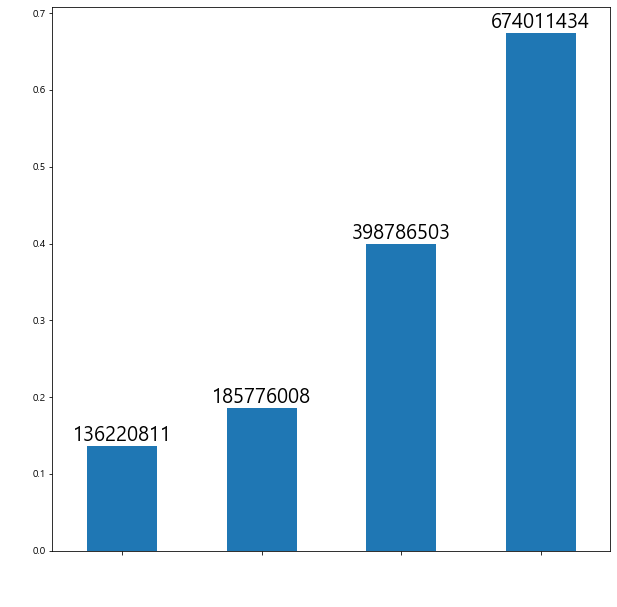

In [14]:
ax = plt.gca()
ax.get_yaxis().set_visible(False)
df2 = new_data['sum']['사용시간(분)']/10**9
df2.plot(kind='bar',grid=False, figsize=(10,10))
plt.xlabel('연도별', fontsize=20, color='white')
plt.ylabel('사용시간(분)', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
for i in range(len(df2)):
    plt.text(i, df2.iloc[i], int(df2.iloc[i]*10**9),
             fontsize=20,
             horizontalalignment='center', 
             verticalalignment='bottom')
plt.show()

In [15]:
import gc
del [df2]
gc.collect()

12420

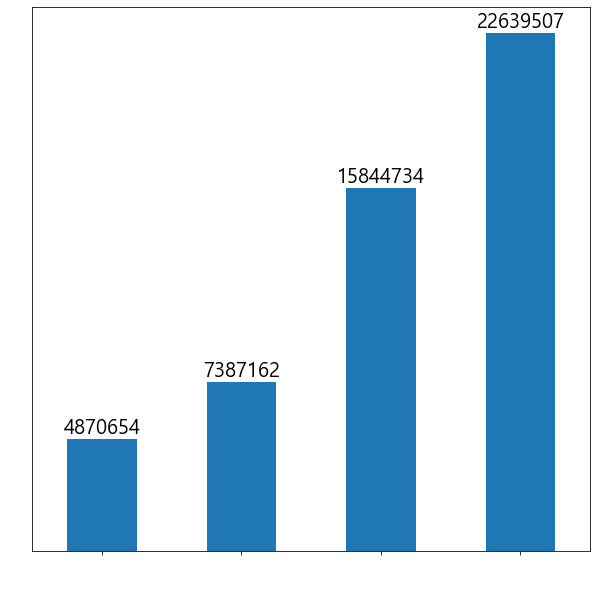

In [19]:
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
df2 = new_data['sum']['이용건수']/10**7
df2.plot(kind='bar',grid=False, figsize=(10,10))
plt.xlabel('연도', fontsize=20, color='white')
plt.ylabel('이용건수', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
for i in range(len(df2)):
    plt.text(i, df2.iloc[i], int(df2.iloc[i]*10**7),
             fontsize=20,
             horizontalalignment='center', 
             verticalalignment='bottom')
plt.show()

In [20]:
age_data=pd.pivot_table(final_data, index = ['년도','연령대코드'], values=['이용건수'],aggfunc = ['sum'])
age_data

sum
                이용건수
년도   연령대코드          
2017 10대이하    122261
     20대     2265774
     30대     1230510
     40대      695699
     50대      274026
     60대       72502
     70대이상     35362
2018 10대이하    149339
     20대     3524402
     30대     1931172
     40대     1111652
     50대      506706
     60대      120959
     70대이상     42932
2019 10대이하    785831
     20대     7791170
     30대     3619938
     40대     2167386
     50대     1147700
     60대      273381
     70대이상     59328
2020 10대이하   1337578
     20대    10300504
     30대     5224796
     40대     3309286
     50대     1897846
     60대      483763
     70대이상     85734

In [21]:
data1=age_data.loc[2017]
data1


,sum
,이용건수
연령대코드,
10대이하,122261
20대,2265774
30대,1230510
40대,695699
50대,274026
60대,72502
70대이상,35362


In [25]:
man=data1.index
man

Index(['10대이하', '20대', '30대', '40대', '50대', '60대', '70대이상'], dtype='object', name='연령대코드')

In [26]:
del [man]
gc.collect()

12218

In [29]:
data1.reset_index()

,연령대코드,sum
,,이용건수
0,10대이하,122261
1,20대,2265774
2,30대,1230510
3,40대,695699
4,50대,274026
5,60대,72502
6,70대이상,35362


In [30]:
data1.reset_columns()

AttributeError: 'DataFrame' object has no attribute 'reset_columns'

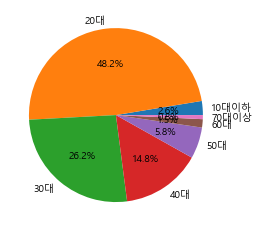

In [32]:
plt.pie(data1['sum']['이용건수'], labels=data1.index, autopct="%0.1f%%")
plt.show()

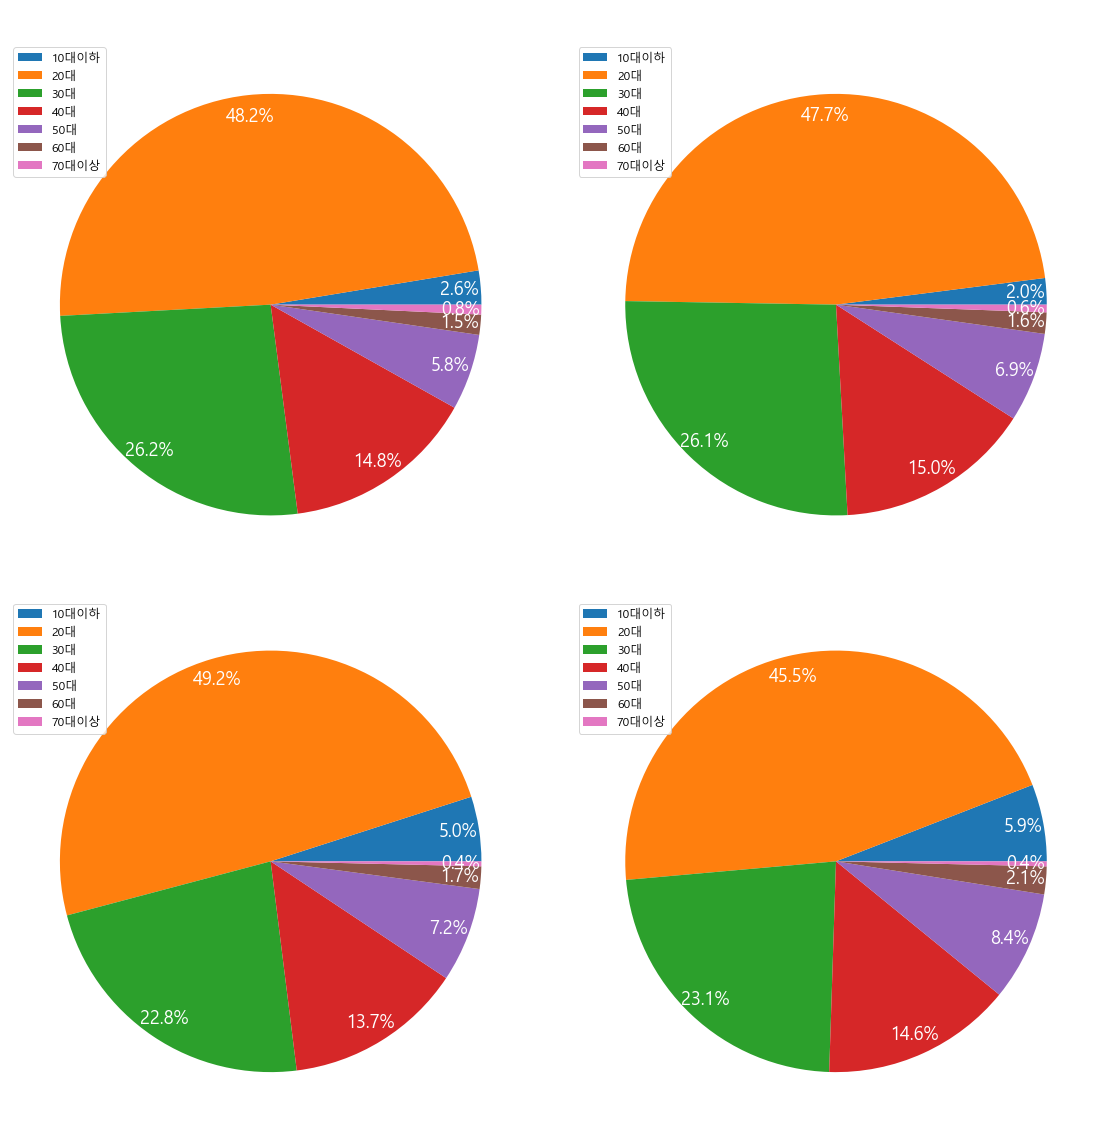

In [82]:
fig = plt.figure(figsize=(16,16))
fig.suptitle("2017~2020년 연령대별 이용 비율",fontsize=16, color='white')
auto_text=textprops=dict(color="w")
for i in range(4):
    data=data1=age_data.loc[2017+i]
    axes = fig.add_subplot(2,2,i+1)
    axes.pie(data['sum']['이용건수'], labels=None, autopct="%0.1f%%",textprops=dict(color="w",fontsize=18),pctdistance=0.9)
    axes.set_title(str(i+2017)+'년',fontsize=16, color='white')
    axes.legend(data.index,loc='upper left', fontsize=12)

    
fig.tight_layout()
plt.show()

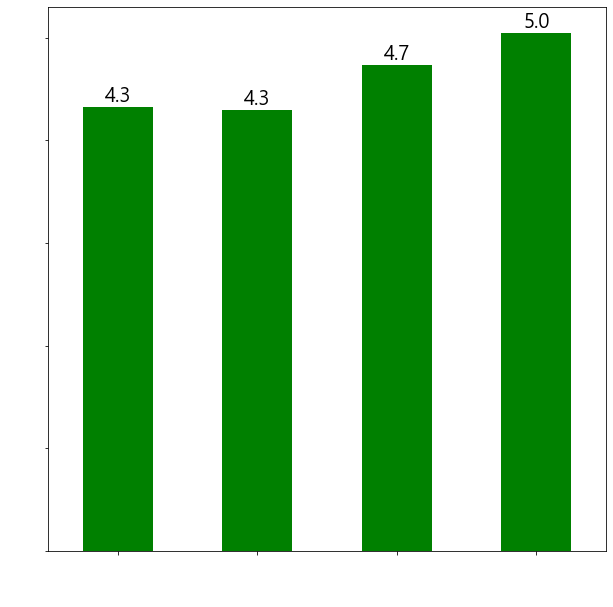

In [92]:
ax.get_yaxis().set_visible(True)
df3 = new_data['mean']['이동거리(KM)']
df3.plot(kind='bar',grid=False, figsize=(10,10), color='green')
plt.xlabel('연도', fontsize=20, color='white')
plt.ylabel('평균 이동거리(KM)', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.yticks(fontsize=16, color='white')
for i in range(len(df3)):
    plt.text(i, df3.iloc[i], round(df3.iloc[i],1),
             fontsize=20,
             horizontalalignment='center', 
             verticalalignment='bottom')
plt.show()

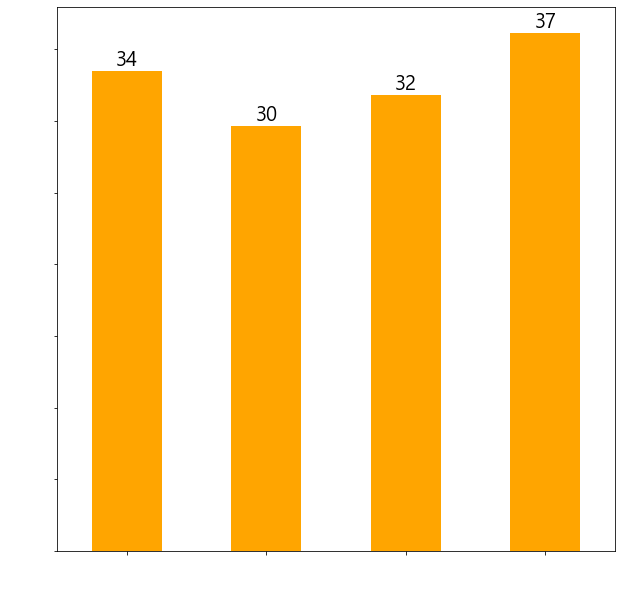

In [93]:
import math
df4 = new_data['mean']['사용시간(분)']
df4.plot(kind='bar',grid=False, figsize=(10,10), color='orange')
plt.xlabel('연도', fontsize=20, color='white')
plt.ylabel('평균 사용시간(분)', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.yticks(fontsize=16, color='white')
for i in range(len(df4)):
    plt.text(i, df4.iloc[i], math.ceil(df4.iloc[i]),
             fontsize=20,
             horizontalalignment='center', 
             verticalalignment='bottom')
plt.show()

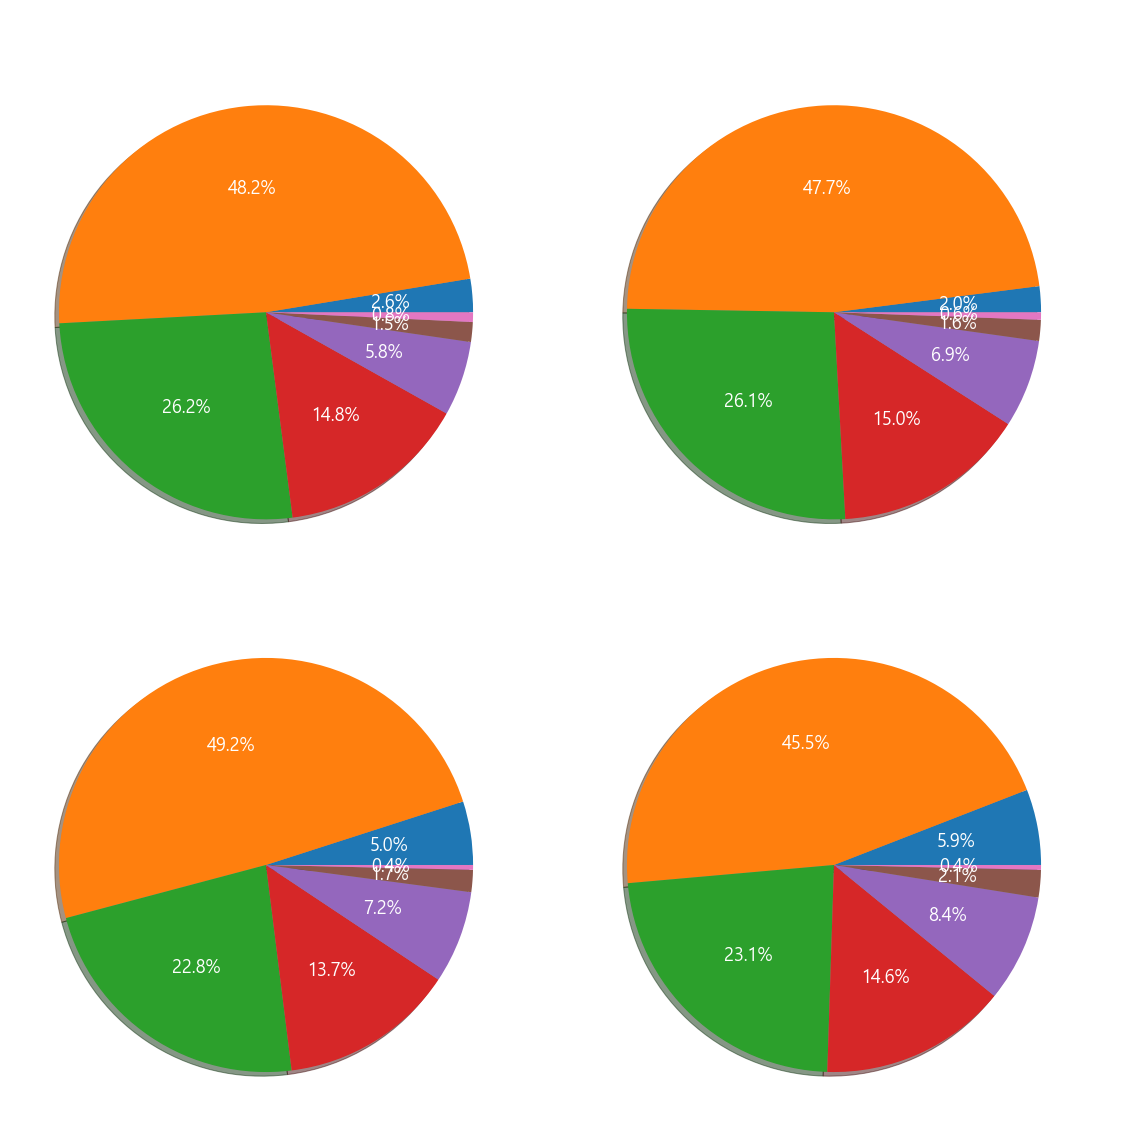

In [100]:
fig = plt.figure(figsize=(16,16))
fig.suptitle("2017~2020년 연령대별 이용 비율",fontsize=25, color='white')
auto_text=textprops=dict(color="w")
for i in range(4):
    data=age_data.loc[2017+i]
    axes = fig.add_subplot(2,2,i+1)
    axes.pie(data['sum']['이용건수'], labels=data.index, autopct="%0.1f%%",textprops=dict(color="w",fontsize=18),
             pctdistance=0.6, shadow=True)
    axes.set_title(str(i+2017)+'년',fontsize=20, color='white')

    
fig.tight_layout()
plt.show()

In [102]:
time_data = pd.pivot_table(final_data, index = ['년도','대여시간'], values=['이용건수'],aggfunc = ['sum','count'])
time_data

sum    count
              이용건수     이용건수
년도   대여시간                  
2017 0      140911   120672
     1      104367    92239
     2       71505    64415
     3       46737    42895
     4       30908    28996
     5       33446    31915
     6       65736    61829
     7      163237   139706
     8      291214   230851
     9      168823   150854
     10     136302   124610
     11     165563   146975
     12     197489   173369
     13     201830   177379
     14     219103   190463
     15     245457   209730
     16     276697   233219
     17     330884   272883
     18     489540   368928
     19     375073   300159
     20     327096   265986
     21     318825   257056
     22     279220   225126
     23     190691   158274
2018 0      229879   201778
     1      177738   160547
     2      123910   114018
     3       82282    77204
     4       52497    50073
     5       53349    51333
     6      112434   105988
     7      255265   223393
     8      467982   377436
     9      264729   239044
     10     212879   195948
     11     247119   222629
     12     290148   259228
     13     305046   272343
     14     318897   282052
     15     351432   307173
     16     401178   345228
     17     509417   422280
     18     733894   555904
     19     542871   438945
     20     478176   391893
     21     465324   378779
     22     417355   340016
     23     293361   247456
2019 0      525053   432002
     1      423881   362567
     2      297446   261057
     3      204494   183294
     4      127477   117083
     5      124917   116908
     6      232540   213329
     7      553970   464463
     8      958887   720184
     9      559034   477973
     10     441423   388612
     11     512748   442624
     12     591362   503078
     13     617782   520335
     14     654538   543786
     15     725598   593559
     16     855377   683299
     17    1128129   853442
     18    1561007  1079349
     19    1160934   865270
     20    1042935   783589
     21    1004567   749058
     22     900259   672054
     23     640376   502259
2020 0      635563   548899
     1      486480   433574
     2      333796   303804
     3      228552   211944
     4      155545   146906
     5      162892   155851
     6      314847   295822
     7      749783   651863
     8     1220927   979502
     9      773855   685678
     10     673066   608419
     11     814015   718923
     12     957541   833681
     13    1039950   893079
     14    1137758   961630
     15    1259704  1049462
     16    1435742  1176892
     17    1844658  1430680
     18    2155533  1607690
     19    1616658  1265739
     20    1430163  1124152
     21    1324621  1041229
     22    1103939   878909
     23     783919   648420

In [127]:
new_list=[]
# value=0
# for data in time_data['sum']['이용건수']:
#     value = data
#     new_list.append(value)
        
new_list

time_data.loc[2017].loc[0:2]['sum']['이용건수']

for i in range(0,24,3):
    value = time_data.loc[2017].loc[i:i+2]['sum']['이용건수']
    sum_value = np.sum(value)
    new_list.append(sum_value)
    
new_list
x_axis=list(range(len(new_list)))

    

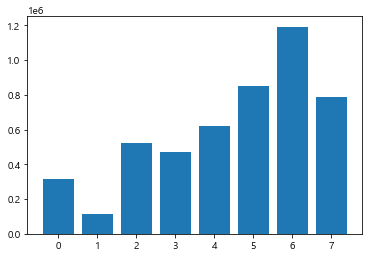

In [128]:
plt.bar(x_axis,new_list)
plt.show()



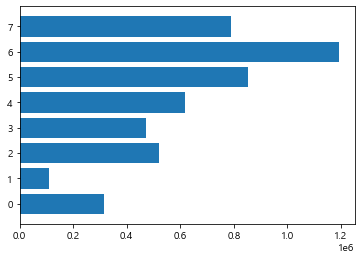

In [129]:
plt.barh(x_axis,new_list)
plt.show()


In [130]:
time_list=['0~2시','3~5시','6~8시','9~11시','12~14시','15~17시','18~20시','21~23시']
time_df = pd.DataFrame(data=new_list, index=time_list, columns=['이용건수'])
time_df




,이용건수
0~2시,316783
3~5시,111091
6~8시,520187
9~11시,470688
12~14시,618422
15~17시,853038
18~20시,1191709
21~23시,788736


In [142]:
del [time_df]
gc.collect()

14445

In [143]:
time_list=['0~2시','3~5시','6~8시','9~11시','12~14시','15~17시','18~20시','21~23시']
time_df = pd.DataFrame(data=new_list, index=time_list, columns=['이용건수'])
time_df

,0
0~2시,316783
3~5시,111091
6~8시,520187
9~11시,470688
12~14시,618422
15~17시,853038
18~20시,1191709
21~23시,788736


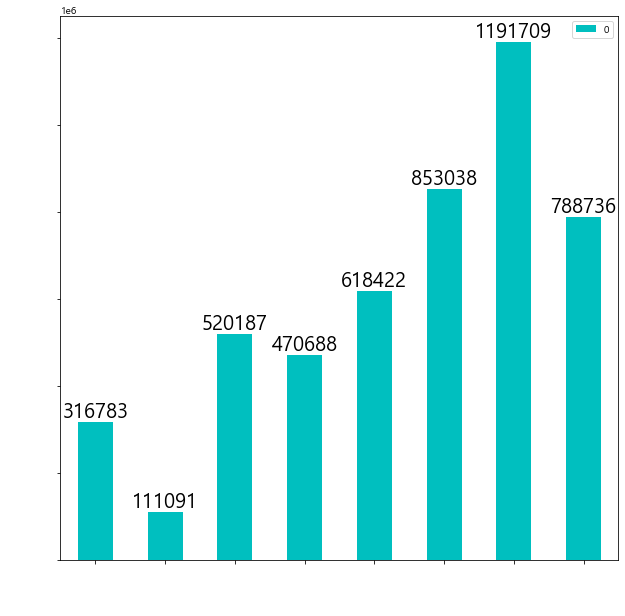

In [144]:
time_df.plot(kind='bar',grid=False, figsize=(10,10), color='c')
plt.xlabel('시간별', fontsize=20, color='white')
plt.ylabel('총 이용건수', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.yticks(fontsize=16, color='white')
for i in range(len(time_df)):
    plt.text(i, time_df.iloc[i], int(time_df.iloc[i]),
             fontsize=20,
             horizontalalignment='center', 
             verticalalignment='bottom')
plt.show()

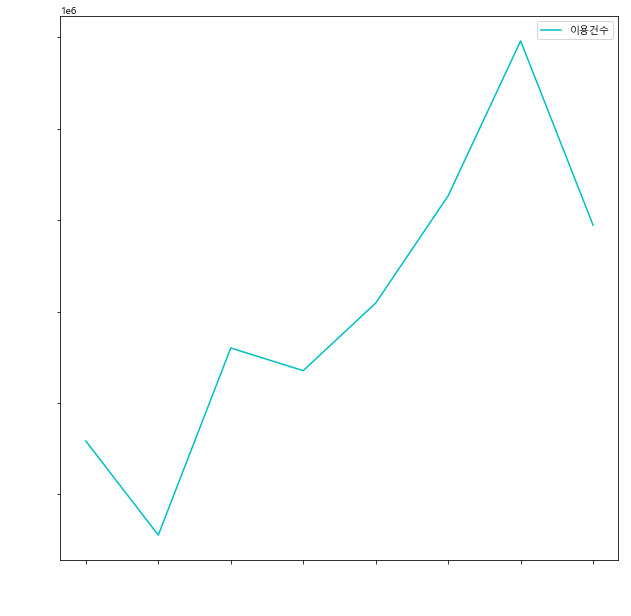

In [141]:
time_df.plot(figsize=(10,10), color='c')
plt.xlabel('시간별', fontsize=20, color='white')
plt.ylabel('총 이용건수', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.yticks(fontsize=16, color='white')
plt.show()

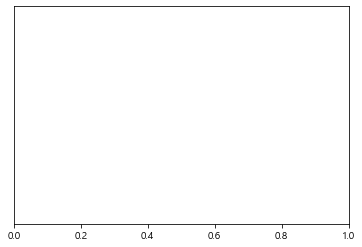

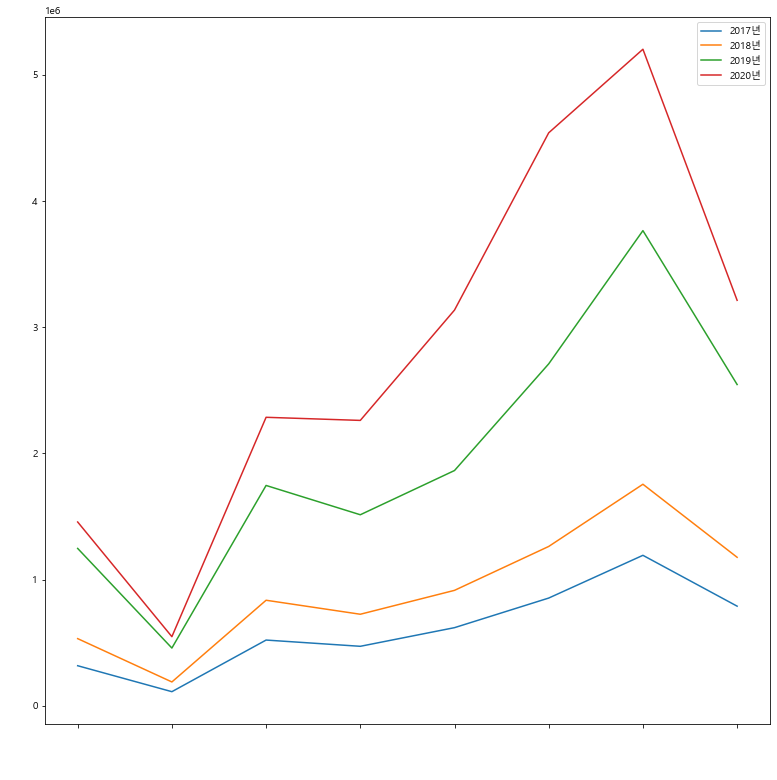

In [163]:
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
plt.figure(figsize = (13, 13))
time_list=['0~2시','3~5시','6~8시','9~11시','12~14시','15~17시','18~20시','21~23시']
for i in range(4):
    new_list=[]
    for j in range(0,24,3):
        value = time_data.loc[2017+i].loc[j:j+2]['sum']['이용건수']
        sum_value = np.sum(value)
        new_list.append(sum_value)
    plt.plot(time_list,new_list)
    
plt.xlabel('시간', fontsize=20, color='white')
plt.ylabel('총 이용건수', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.legend(['2017년', '2018년','2019년','2020년'])
plt.show()
    
    
    

In [164]:
import seaborn as sns

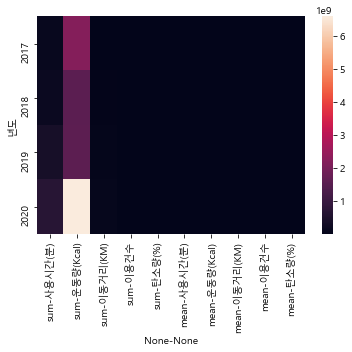

In [165]:
sns.heatmap(new_data)
plt.show()

In [166]:
df = new_data.corr()
df


sum                                              mean  \
                 사용시간(분) 운동량(Kcal)  이동거리(KM)      이용건수    탄소량(%)   사용시간(분)   
sum  사용시간(분)    1.000000  0.843656  0.998201  0.991060  0.999359  0.699057   
     운동량(Kcal)  0.843656  1.000000  0.810220  0.764486  0.824930  0.872133   
     이동거리(KM)   0.998201  0.810220  1.000000  0.997216  0.999665  0.662738   
     이용건수       0.991060  0.764486  0.997216  1.000000  0.994956  0.622142   
     탄소량(%)     0.999359  0.824930  0.999665  0.994956  1.000000  0.675189   
mean 사용시간(분)    0.699057  0.872133  0.662738  0.622142  0.675189  1.000000   
     운동량(Kcal) -0.266335  0.249048 -0.321352 -0.382076 -0.300541  0.465815   
     이동거리(KM)   0.986387  0.795112  0.987547  0.986624  0.986366  0.725544   
     이용건수       0.431123 -0.038732  0.470979  0.526760  0.450427  0.150437   
     탄소량(%)     0.993671  0.862707  0.988377  0.978621  0.990306  0.768298   

                                                        
               운동량(Kcal)  이동거리(KM)      이용건수    탄소량(%)  
sum  사용시간(분)   -0.266335  0.986387  0.431123  0.993671  
     운동량(Kcal)  0.249048  0.795112 -0.038732  0.862707  
     이동거리(KM)  -0.321352  0.987547  0.470979  0.988377  
     이용건수      -0.382076  0.986624  0.526760  0.978621  
     탄소량(%)    -0.300541  0.986366  0.450427  0.990306  
mean 사용시간(분)    0.465815  0.725544  0.150437  0.768298  
     운동량(Kcal)  1.000000 -0.265727 -0.581474 -0.184714  
     이동거리(KM)  -0.265727  1.000000  0.551955  0.992341  
     이용건수      -0.581474  0.551955  1.000000  0.445936  
     탄소량(%)    -0.184714  0.992341  0.445936  1.000000

In [169]:
new_data_sum=new_data['sum']
heat_df = new_data_sum.corr()
heat_df

,사용시간(분),운동량(Kcal),이동거리(KM),이용건수,탄소량(%)
사용시간(분),1.000000,0.843656,0.998201,0.991060,0.999359
운동량(Kcal),0.843656,1.000000,0.810220,0.764486,0.824930
이동거리(KM),0.998201,0.810220,1.000000,0.997216,0.999665
이용건수,0.991060,0.764486,0.997216,1.000000,0.994956
탄소량(%),0.999359,0.824930,0.999665,0.994956,1.000000


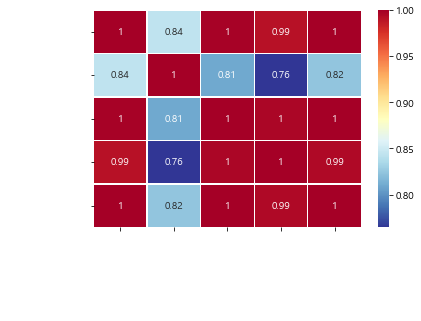

In [192]:
sns.heatmap(heat_df, cmap = 'RdYlBu_r', 
            annot = True,
            linewidths=0.3)
plt.xticks(fontsize=13, color='white')
plt.yticks(fontsize=13, color='white')
plt.show()

In [193]:
del [new_data]
gc.collect()

22673

In [195]:
new_data=pd.pivot_table(final_data, index = ['년도','월','연령대코드'], values=['사용시간(분)'],\
                        aggfunc = ['sum','mean'])
new_data

sum       mean
                사용시간(분)    사용시간(분)
년도   월  연령대코드                     
2017 1  10대이하     31730  26.507937
        20대      599556  19.767755
        30대      371528  16.831023
        40대      257712  17.790418
        50대      105708  17.492636
        60대       34534  21.870804
        70대이상     17892  18.464396
     2  10대이하     54593  36.250332
        20대      776402  25.203766
        30대      414244  18.883348
        40대      272486  18.943687
        50대      113392  18.829625
        60대       35299  20.522674
        70대이상     17206  19.310887
     3  10대이하     95266  34.305366
        20대     2221934  31.951884
        30대     1013522  23.773738
        40대      646209  23.690618
        50대      234764  21.498535
        60대       78663  25.285439
        70대이상    163205  25.162658
     4  10대이하    208680  35.629162
        20대     4903032  39.413124
        30대     2170641  30.858392
        40대     1107163  27.912845
        50대      403875  25.356291
        60대      118873  27.459690
        70대이상     45180  24.906284
     5  10대이하    359187  37.801200
        20대     7112146  39.356464
        30대     3117716  32.143059
        40대     1565268  29.805545
        50대      595884  28.441793
        60대      175688  29.955328
        70대이상     64699  27.851485
     6  10대이하    397966  34.423147
        20대     7938861  38.001891
        30대     3853573  32.725345
        40대     2007307  30.823792
        50대      774170  29.509053
        60대      221384  31.830913
        70대이상    108997  32.870024
     7  10대이하    274833  32.170549
        20대     4647807  33.306630
        30대     2415427  29.843298
        40대     1374222  28.848392
        50대      608927  28.627098
        60대      175618  30.918662
        70대이상     58498  25.301903
     8  10대이하    413915  34.398321
        20대     6941203  36.357367
        30대     3361008  31.298382
        40대     1891937  30.541221
        50대      804580  29.837938
        60대      246381  32.164621
        70대이상     74517  25.242886
     9  10대이하    686893  35.212642
        20대    12190764  40.445651
        30대     5817638  34.843458
        40대     3144604  33.044745
        50대     1268912  30.925690
        60대      384318  34.070745
        70대이상    112938  27.640235
     10 10대이하    694571  33.059067
        20대    10793570  36.893652
        30대     5745950  34.762420
        40대     3343815  34.840479
        50대     1353148  32.185624
        60대      340790  33.394415
        70대이상    111630  29.108214
     11 10대이하    284211  23.469116
        20대     4061523  24.340903
        30대     2494681  24.276771
        40대     1719266  25.442715
        50대      736784  24.567656
        60대      218274  27.706778
        70대이상     66162  24.050164
     12 10대이하    106047  21.397700
        20대     1349621  19.067830
        30대      927288  19.440408
        40대      703871  21.496839
        50대      295169  20.683134
        60대      111514  26.263307
        70대이상     39420  24.870662
2018 1  10대이하     41482  24.545562
        20대     1019128  18.924960
        30대      800463  18.931979
        40대      583504  20.346037
        50대      291836  20.725517
        60대       95474  25.297827
        70대이상     43001  24.103700
     2  10대이하     54859  31.600806
        20대     1245676  22.543316
        30대      901266  20.995807
        40대      642896  22.202514
        50대      308392  22.402441
        60대       98150  26.722026
        70대이상     41480  23.095768
     3  10대이하    182112  33.341633
        20대     5135739  31.795123
        30대     2756647  27.377293
        40대     1725368  27.253124
        50대      772403  26.467567
        60대      223491  29.161143
        70대이상     91452  27.397244
     4  10대이하    276570  31.673156
        20대     8028067  34.668591
        30대     4341900  31.423650
        40대     2405505  29.836091
        50대     1035553  28.475857
        60대      275552  30.042739
        70대이상    100713  29.55

In [223]:
del [new_data]
gc.collect()

7513

In [224]:
new_data=pd.pivot_table(final_data, index = ['년도','연령대코드'], values=['사용시간(분)'],\
                        aggfunc = ['sum','mean'])
new_data

sum       mean
              사용시간(분)    사용시간(분)
년도   연령대코드                      
2017 10대이하    3607892  32.633182
     20대     63536419  35.165826
     30대     31703216  30.402768
     40대     18033860  29.347830
     50대      7295313  27.879928
     60대      2141336  30.370114
     70대이상     880344  26.420888
2018 10대이하    3884583  28.146093
     20대     87482496  30.813938
     30대     48446216  29.414003
     40대     28326423  28.540793
     50대     13062847  27.048816
     60대      3457815  29.098349
     70대이상    1115628  26.365458
2019 10대이하   20947770  32.758940
     20대    191639747  33.977811
     30대     91299990  30.634024
     40대     56001346  29.731665
     50대     29320893  27.575502
     60대      7968159  30.136873
     70대이상    1608598  27.744494
2020 10대이하   41606373  36.471320
     20대    292652903  37.139532
     30대    154447716  35.026280
     40대    106940401  36.776096
     50대     59075391  33.545950
     60대     16434720  35.005772
     70대이상    2853930  33.872530

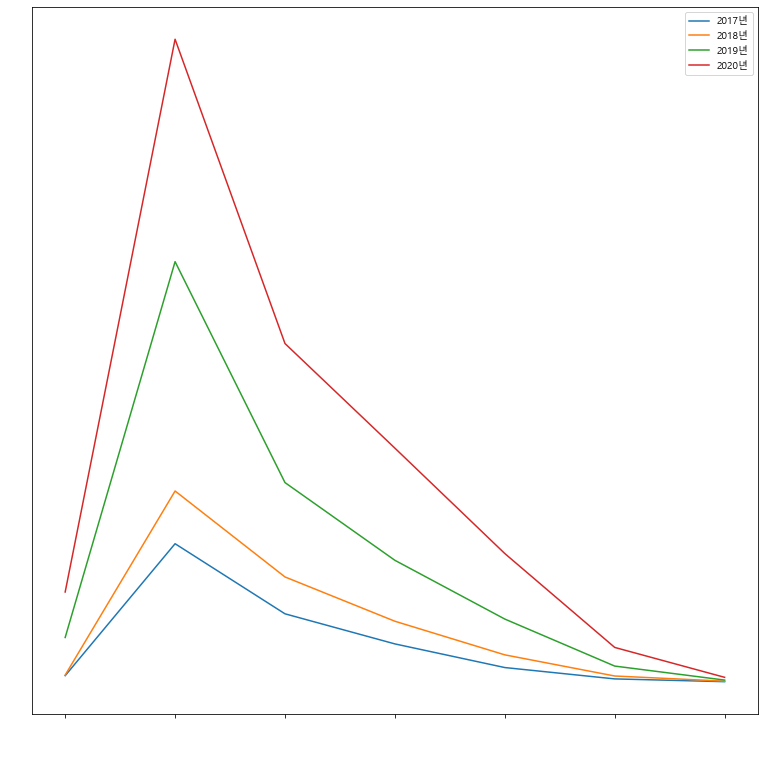

In [225]:

plt.figure(figsize = (13, 13))
plt.plot(new_data.loc[2017].index,new_data.loc[2017]['sum']['사용시간(분)'])
plt.plot(new_data.loc[2018].index,new_data.loc[2018]['sum']['사용시간(분)'])
plt.plot(new_data.loc[2019].index,new_data.loc[2019]['sum']['사용시간(분)'])
plt.plot(new_data.loc[2020].index,new_data.loc[2020]['sum']['사용시간(분)'])
plt.xlabel('연령대', fontsize=20, color='white')
plt.ylabel('총사용시간', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0) 
plt.legend(['2017년', '2018년','2019년','2020년'])
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
plt.show()

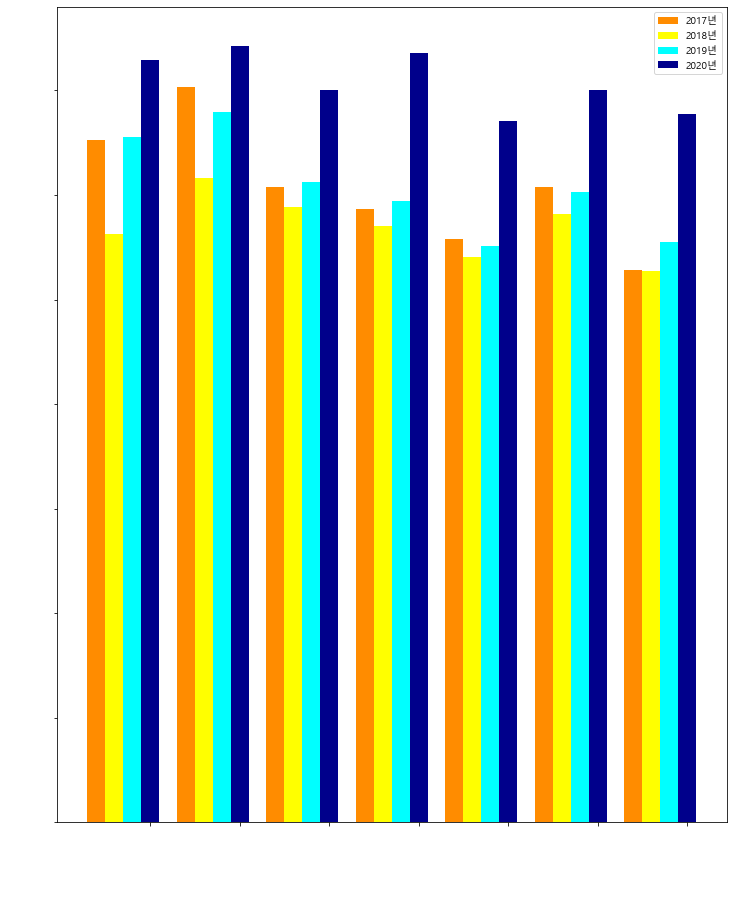

In [259]:
plt.figure(figsize = (12, 15))
age_list=['10대이하','20대','30대','40대','50대','60대','70대이상']
x=np.arange(len(age_list))
plt.bar(x-0.6,new_data.loc[2017]['mean']['사용시간(분)'], label='2017년', width=0.2,color='darkorange')
plt.bar(x-0.4,new_data.loc[2018]['mean']['사용시간(분)'], label='2018년', width=0.2,color='yellow')
plt.bar(x-0.2,new_data.loc[2019]['mean']['사용시간(분)'], label='2019년', width=0.2,color='cyan')
plt.bar(x-0,new_data.loc[2020]['mean']['사용시간(분)'], label='2020년', width=0.2, color='darkblue')
plt.xlabel('연령대', fontsize=20, color='white')
plt.ylabel('평균 사용시간', fontsize=20, color='white')
plt.xticks(x,age_list,fontsize=16, color='white', rotation=45)
plt.yticks(fontsize=16, color='white', rotation=0)
plt.legend(['2017년', '2018년','2019년','2020년'])
plt.show()

In [230]:
new_data.loc[2017]['mean']['사용시간(분)']

연령대코드
10대이하    32.633182
20대      35.165826
30대      30.402768
40대      29.347830
50대      27.879928
60대      30.370114
70대이상    26.420888
Name: 사용시간(분), dtype: float64

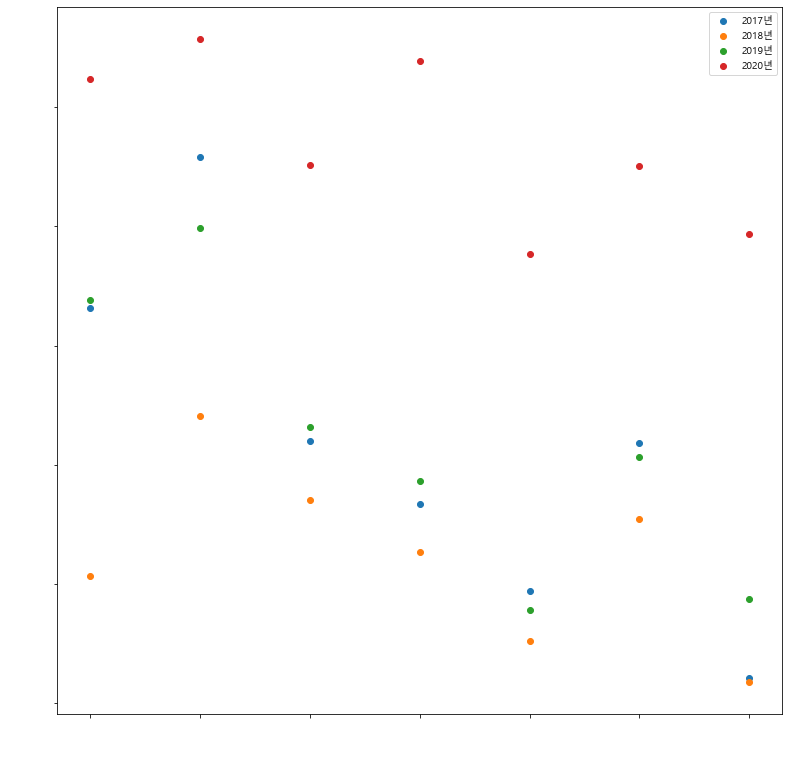

In [242]:
plt.figure(figsize = (13, 13))
plt.scatter(new_data.loc[2017].index,new_data.loc[2017]['mean']['사용시간(분)'])
plt.scatter(new_data.loc[2018].index,new_data.loc[2018]['mean']['사용시간(분)'])
plt.scatter(new_data.loc[2019].index,new_data.loc[2019]['mean']['사용시간(분)'])
plt.scatter(new_data.loc[2020].index,new_data.loc[2020]['mean']['사용시간(분)'])
plt.xlabel('연령대', fontsize=20, color='white')
plt.ylabel('평균 사용시간', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.yticks(fontsize=16, color='white', rotation=0)
plt.legend(['2017년', '2018년','2019년','2020년'])
plt.show()

In [ ]:
plt.figure(figsize = (13, 13))
plt.plot(new_data.loc[2017,1].index,new_data.loc[2017,1]['mean']['사용시간(분)'])
plt.plot(new_data.loc[2017,2].index,new_data.loc[2017,2]['mean']['사용시간(분)'])
plt.plot(new_data.loc[2017,3].index,new_data.loc[2017,3]['mean']['사용시간(분)'])
plt.plot(new_data.loc[2017,4].index,new_data.loc[2017,4]['mean']['사용시간(분)'])
plt.xlabel('연령대', fontsize=20, color='white')
plt.ylabel('총사용시간', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white', rotation=0)
plt.ylim([0, 5*10**6])   
plt.legend(['2017년', '2018년','2019년','2020년'])
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
plt.show()

In [207]:
new_data.loc[2017,1].index

Index(['10대이하', '20대', '30대', '40대', '50대', '60대', '70대이상'], dtype='object', name='연령대코드')

In [260]:
time_data = pd.pivot_table(final_data, index = ['년도','월'], values=['사용시간(분)'],\
                        aggfunc = ['sum','mean'])
time_data


sum       mean
          사용시간(분)    사용시간(분)
년도   월                      
2017 1    1418660  18.501526
     2    1683622  21.790228
     3    4453563  27.365619
     4    8957444  34.144929
     5   12990588  35.217921
     6   15302258  34.789640
     7   10322803  32.555729
     8   15283230  35.446278
     9   26511648  39.071031
     10  25379472  37.783264
     11  10210097  25.394966
     12   3707426  20.570298
2018 1    2874888  19.672150
     2    3292719  22.231578
     3   10887212  29.331907
     4   16463860  32.406558
     5   24136708  35.355038
     6   29842562  34.119979
     7   21158065  29.677827
     8   18004123  28.492270
     9   21825720  33.388640
     10  17896615  28.324375
     11  10295339  22.760832
     12   9098197  20.344169
2019 1    5566003  19.548080
     2    5216446  21.699388
     4   22657268  31.937015
     5   56282511  34.633004
     6   55805884  33.779043
     7   49059547  31.542063
     8   51081649  35.378484
     9   51137576  35.211223
     10  56429493  33.113024
     11  30197007  26.183178
     12  15353119  21.672217
2020 1   15151857  22.249488
     2   16211088  24.956376
     3   46033886  39.228622
     4   66796252  41.736128
     5   77992138  43.075347
     6   80778770  38.693914
     7   74856411  37.066382
     8   47223259  33.085449
     9   91194900  41.962375
     10  82205367  35.609693
     11  47099912  28.307787
     12  28467594  26.917903

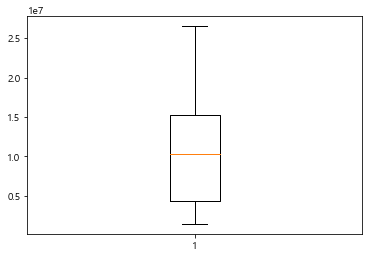

In [262]:
plt.boxplot(time_data.loc[2017]['sum']['사용시간(분)'])

plt.show()

In [263]:
final=pd.pivot_table(final_data, index = ['년도','대여소명'], values=['이용건수'],\
                        aggfunc = ['sum'])
final

sum
                      이용건수
년도   대여소명                 
2017 (구)신한은행 중랑교지점      64
     (구)합정동 주민센터      4616
     3호선 매봉역 3번출구앞    2945
     4동 주민센터 대여소       612
     5단지 사이             55
...                    ...
2020 흑석한강푸르지오(110동)   1015
     흥국사 정류장           644
     희성오피앙           13860
     희훈타워빌 앞           593
     힐스테이트에코         14285

[6352 rows x 1 columns]

In [264]:
final.head(100)

sum
                                 이용건수
년도   대여소명                            
2017 (구)신한은행 중랑교지점                 64
     (구)합정동 주민센터                 4616
     3호선 매봉역 3번출구앞               2945
     4동 주민센터 대여소                  612
     5단지 사이                        55
     9호선종합운동장역 9번출구              6269
     CJ 드림시티                    20262
     CJ제일제당 앞                    5448
     DMC빌 앞                      5075
     DMC산학협력연구센터 앞              11532
     DMC역 2번출구 옆                12461
     DMC역 9번출구 앞                16961
     DMC홍보관                      7956
     IFC몰                       14714
     K+ 타워 앞                       34
     KAIST 경영대학 앞                4828
     KBS 앞                      11388
     KB국민은행 염창역 지점 앞             7835
     KEB 하나은행 본점 앞               9835
     KEB 하나은행(내자동 지점) 앞          2226
     KEB하나은행 성수중앙지점              5572
     KEB하나은행 청량리역지점              3865
     KT 노원점 건물 앞                 9970
     KT 서초지사 앞                   1600
     KT&G 관악지점                   1561
     KT앞                        13298
     KT혜화지사 앞                   10368
     LG CNS앞                     8950
     LG서비스 역촌점                   5737
     LG전자 별관동(호서대 벤처타워 맞은편)      1271
     LIGA 아파트 앞                  5727
     LIG강촌아파트 103동앞              6146
     MCM 본사 직영점 앞                1691
     NH농협 신촌지점 앞                 5036
     NH농협은행 앞                    8797
     SK telecom(수유직영점) 앞         1337
     SK 서린빌딩 앞                   7028
     SK망원동주유소 건너편                9675
     SK제삼주유소 앞                    105
     STX V타워                     1968
     YP 센터 앞                     1509
     e 편한세상 보문아파트 내                52
     가락미륭아파트 앞                    145
     가락시장역 3번 출구                 4443
     가락시장역 롯데마트앞                  119
     가리봉동주민센터                      82
     가산동 주민센터                      47
     가산디지털단지역 5번출구               2018
     가양레포츠센터앞                    5244
     가재울 뉴타운 주유소 옆               7156
     가재울 초등학교                    9920
     가좌역 4번출구 앞                  9679
     가좌역1 번출구 뒤                  8544
     갑을그레이트밸리 앞                   974
     강남 을지병원 교차로                    1
     강남구청                         928
     강남구청역 2번출구 뒤                1339
     강남세브란스교차로  래미안그레이튼 104동 앞   1397
     강동경찰서                       5371
     강동구청 앞                       171
     강동구청역 1번 출입구                5637
     강동구평생학습관앞                   2976
     강동세무서                       4434
     강변역 4번출구 뒤                  5893
     강북구청 뒷편                      320
     강북구청 사거리 버스정류소 앞            2320
     강북문화예술회관                    2209
     강북중학교 앞                     2020
     강서구의회                       2737
     강서수도사업소민원센터                   58
     강월초교입구 사거리                  1724
     강일 6단지                        36
     강일 다솜 어린이 공원                  24
     강일동 리슈빌 빌딩앞                 2315
     강일동 에너지 마루                     7
     개봉역 1번 출구 자전거보관서쪽           1004
     개봉역(북측광장)                   2016
     개봉지구대 개봉치안센터                1000
     개봉푸르지오아파트 상가                2375
     개포동역 사거리                      59
     개화동상사마을종점 버스정류장              409
     거여역 3번출구                    1363
     거여역 8번출구 뒤                  1276
     건국대학교 (입학정보관)               4838
     건국대학교 (행정관)                 1229
     건국대학교 학생회관                  5129
     경복궁역 4번출구 뒤                15726
     경복궁역 7번출구 앞                10969
     경일중학교 앞                     4923
     고덕동 래미안 힐스테이트                 11
     고덕동 아남아파트                    180
     고덕동 주양쇼핑                      58
     고덕역 4번출구                     272
     고덕초등학교                        15
     고려사대부속중고 건너편                1914
     고려사대부속중고 정문                 2100
     고속터미널역 5번출구 앞               3450
     고속터미널역 8-1번, 8-2번 출구 사이    12640
     고척근린공원 고척도서관 앞              1782
     고척스카이돔구장 광장                 4014

In [265]:
del [final]
gc.collect()

53446

In [266]:
del [time_data]
gc.collect()

20

In [267]:
time_data = pd.pivot_table(final_data, index = ['년도','대여구분코드'], values=['이용건수'],\
                        aggfunc = ['sum'])
time_data

sum
                   이용건수
년도   대여구분코드            
2017 단체권          43058
     일일(2시간권)     67250
     일일권(비회원)    235638
     일일권(회원)     927936
     정기(2시간권)     99842
     정기권        3496930
2018 단체권          57470
     일일권        1215368
     일일권(비회원)       915
     정기권        6113409
2019 단체권         201363
     일일권        2776483
     일일권(비회원)       305
     정기권       12866583
2020 단기권(전기)          3
     단체권         238623
     일일권        5133230
     일일권(비회원)       282
     정기권       17267369

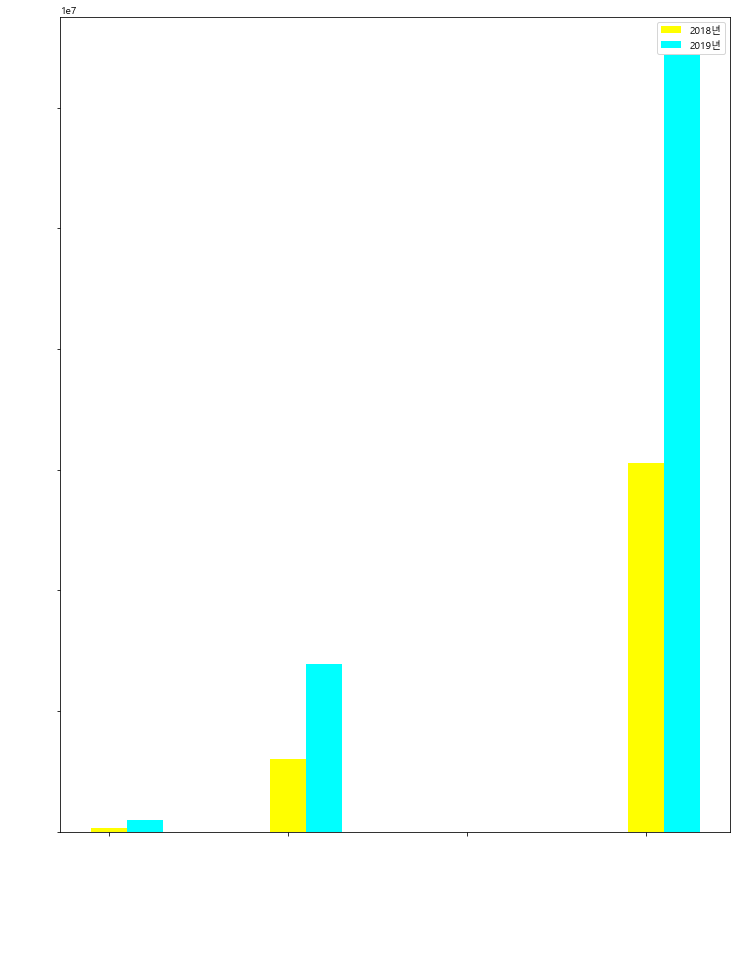

In [271]:
plt.figure(figsize = (12, 15))
data_list=['단체권','일일권','일일권(비회원)','정기권']
x=np.arange(len(data_list))
plt.bar(x+0,time_data.loc[2018]['sum']['이용건수'], label='2018년', width=0.2,color='yellow')
plt.bar(x+0.2,time_data.loc[2019]['sum']['이용건수'], label='2019년', width=0.2,color='cyan')
plt.xlabel('대여코드', fontsize=20, color='white')
plt.ylabel('총 이용건수', fontsize=20, color='white')
plt.xticks(x,data_list,fontsize=16, color='white', rotation=45)
plt.yticks(fontsize=16, color='white', rotation=0)
plt.legend(['2018년', '2019년'])
plt.show()